In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [2]:
import sklearn.preprocessing

In [4]:
from sklearn.linear_model import LinearRegression

In [7]:
from sklearn.model_selection import train_test_split

In [37]:
df = pd.read_csv('bank.csv', header =0,delimiter=",")

In [39]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,0
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,0
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,0
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,0
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,0
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,0
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,0
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,0


In [40]:
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,0
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,0
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,0
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,0
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,0
5,35,management,single,tertiary,no,747,no,no,cellular,23,feb,141,2,176,3,failure,0
6,36,self-employed,married,tertiary,no,307,yes,no,cellular,14,may,341,1,330,2,other,0
7,39,technician,married,secondary,no,147,yes,no,cellular,6,may,151,2,-1,0,unknown,0
8,41,entrepreneur,married,tertiary,no,221,yes,no,unknown,14,may,57,2,-1,0,unknown,0
9,43,services,married,primary,no,-88,yes,yes,cellular,17,apr,313,1,147,2,failure,0


In [41]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous,y
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579,0.115240
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562,0.319347
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000,1.000000


In [47]:
print(df.shape)

(4521, 17)


In [48]:
print(list(df.columns))

['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y']


In [44]:
import seaborn as sns

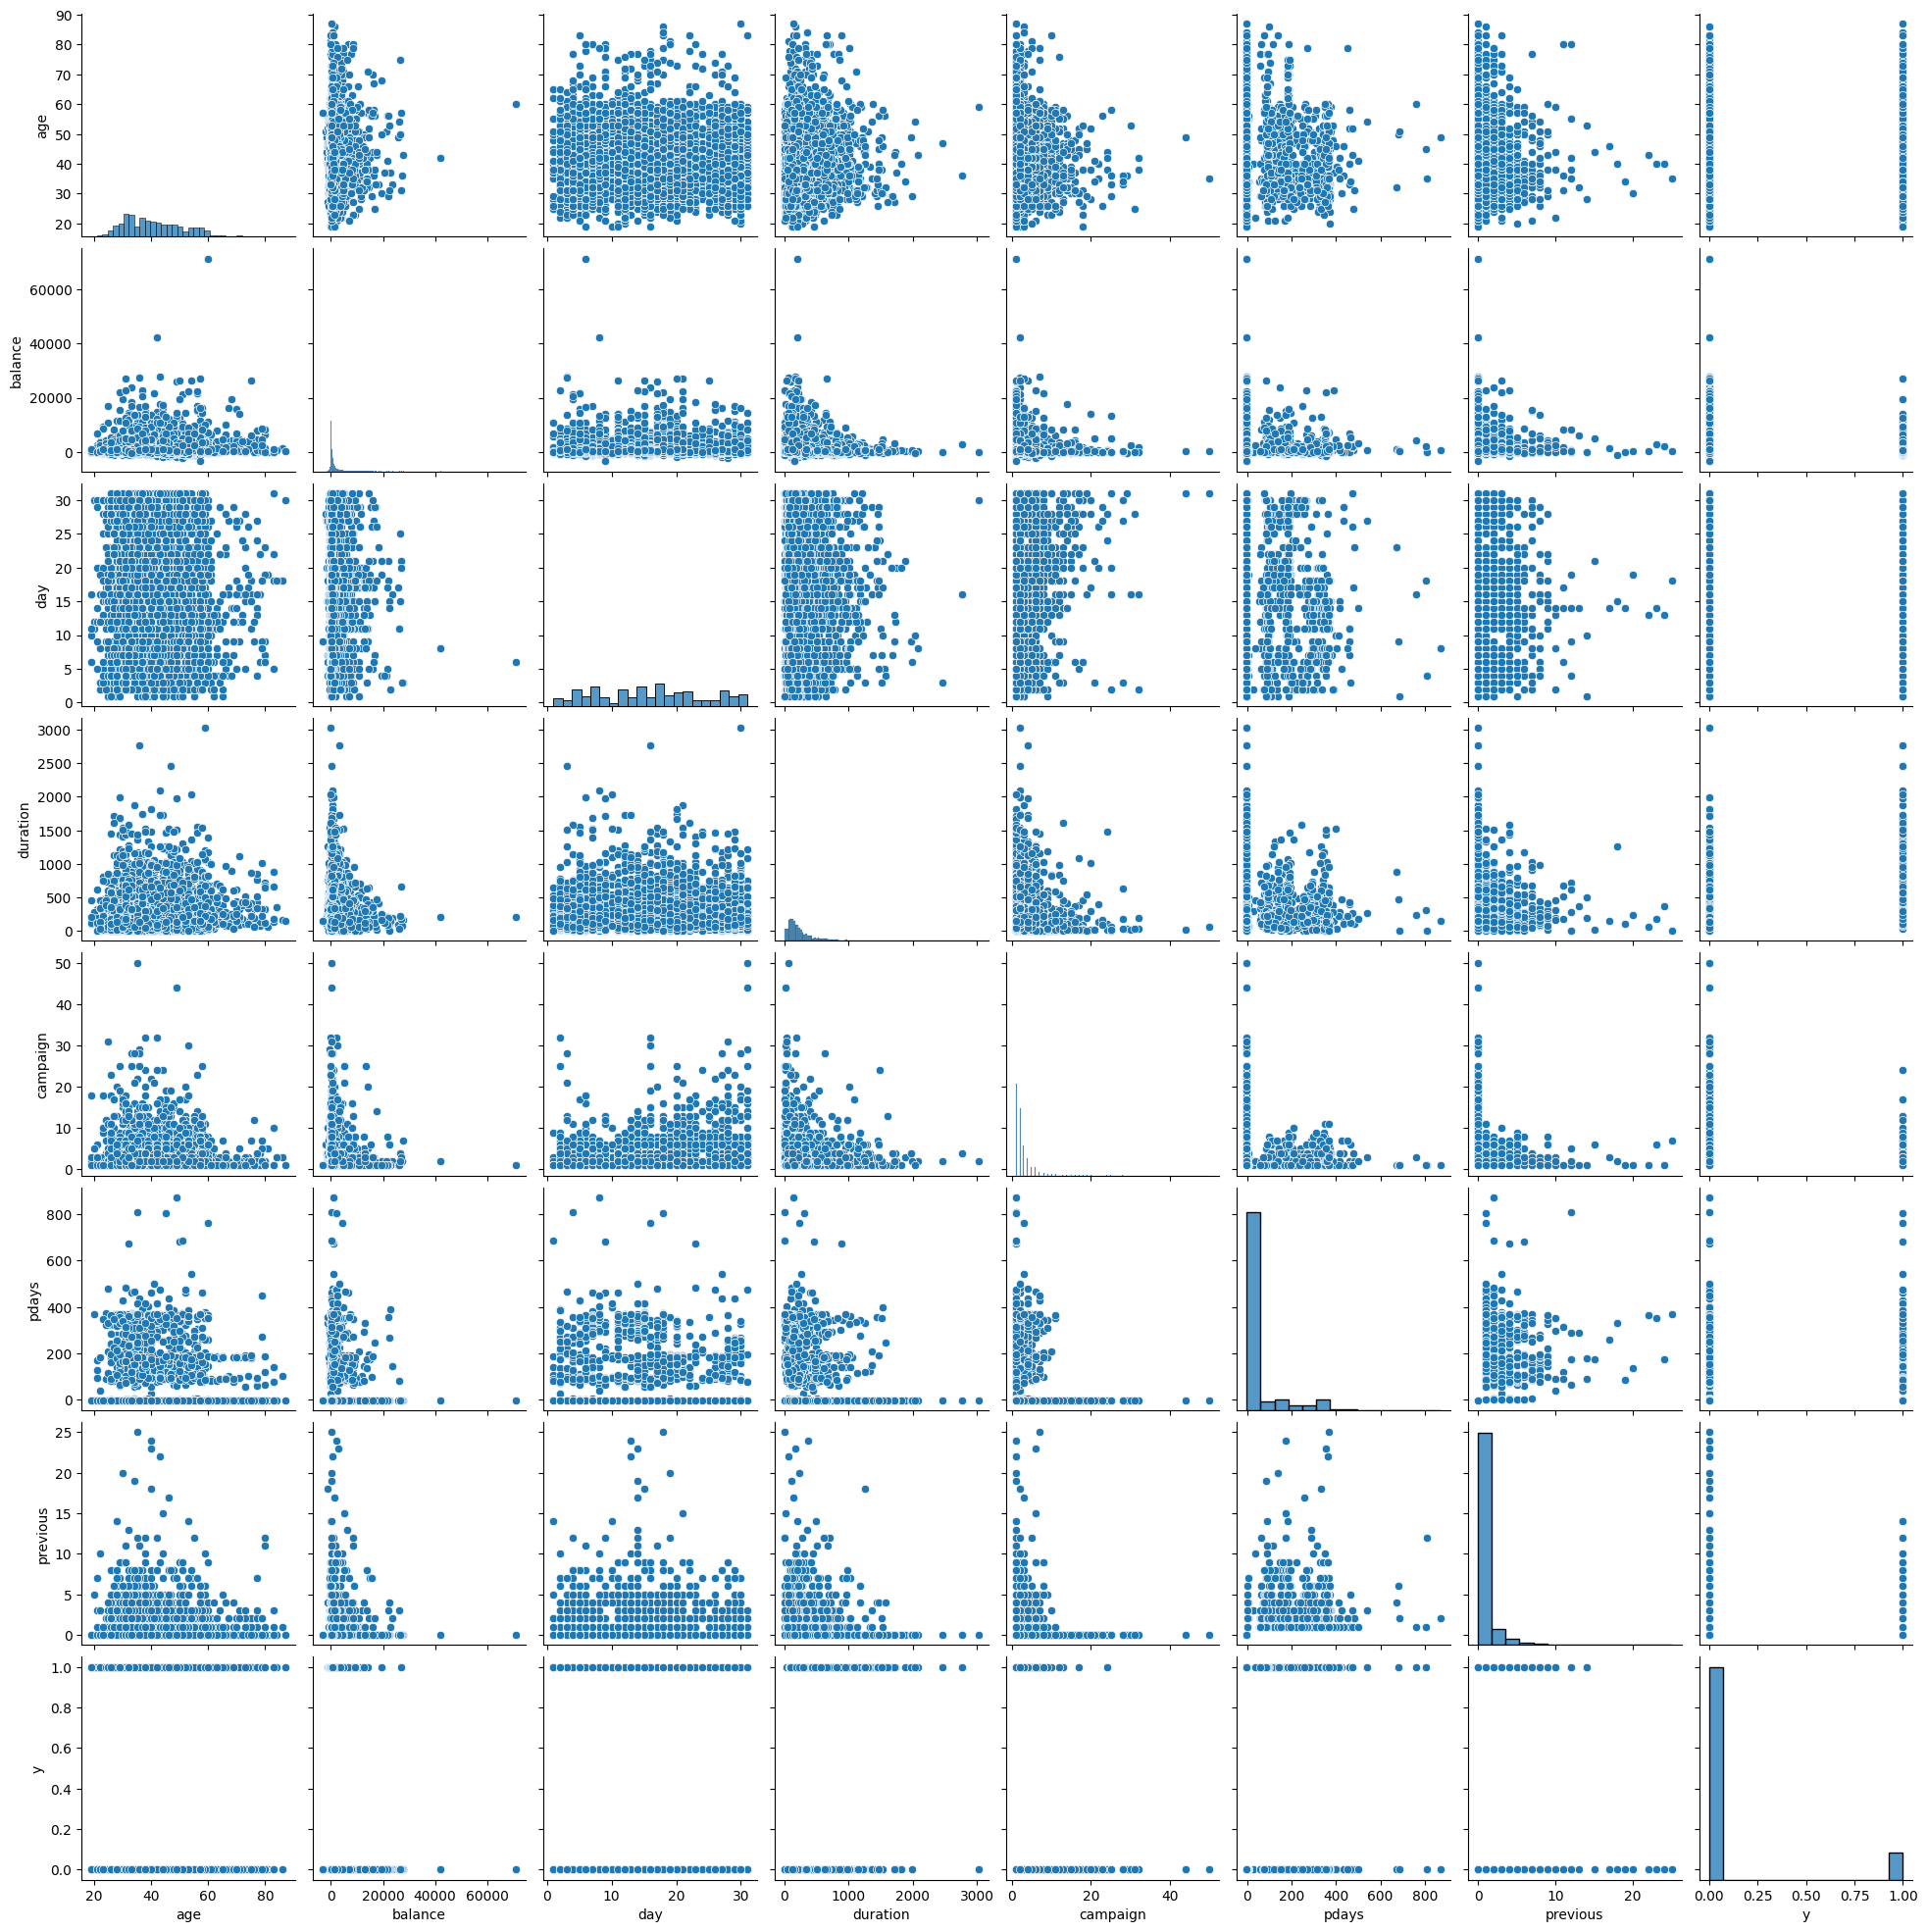

In [46]:
sns.pairplot(df[['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y']])

In [49]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [55]:
df_new = df.drop(df.columns[[0,3,7,8,9,10,11,12,13,14]],axis =1)

In [58]:
df_new.head(10)

,job,marital,default,balance,housing,poutcome,y
0,unemployed,married,no,1787,no,unknown,0
1,services,married,no,4789,yes,failure,0
2,management,single,no,1350,yes,failure,0
3,management,married,no,1476,yes,unknown,0
4,blue-collar,married,no,0,yes,unknown,0
5,management,single,no,747,no,failure,0
6,self-employed,married,no,307,yes,other,0
7,technician,married,no,147,yes,unknown,0
8,entrepreneur,married,no,221,yes,unknown,0
9,services,married,no,-88,yes,failure,0


In [60]:
data = pd.get_dummies(df_new, columns = ['job','marital','default','housing','poutcome'],drop_first=False)